In [28]:
import numpy as np 
import pandas as pd

from sklearn import datasets

from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns 

RSEED = 2

from sklearn.metrics import pairwise_distances_argmin

In [ ]:

def calculate_distances(vector1, vector2, name_of_distance_metric):
    if name_of_distance_metric == "euclidean":  
        distance =  np.sqrt(np.sum(np.square(vector1 - vector2))) #Euclidean distance between any two given vectors (numpy arrays)
    else:
        distance = np.sum(abs(vector1 - vector2)) #Manhattan distance 

    return distance

In [30]:
v1 = np.array((5, 8, 9, 4, 34))
v2 = np.array((1, 5, 89, 7, 2))
euclidean = calculate_distances(v1,v2, "euclidean")
manhattan = calculate_distances(v1,v2, "manhattan")
print(manhattan), print(euclidean)

122
86.35971282953643


(None, None)

In [ ]:
#Purity
true = ['a', 'b', 'a', 'b', 'a'] 
predicted = [1, 1, 1, 0, 1]
metrics.cluster.contingency_matrix(['a', 'b', 'a', 'b', 'a'], [1, 1, 1, 0, 1])

array([[0, 3],
       [1, 1]], dtype=int64)

In [32]:
def purity(y_true, y_pred):
    
    num_classes = len(np.unique(y_true))
    matrix = np.zeros((num_classes,num_classes))
    
    for count, element in enumerate(y_true):
        matrix[element][y_pred[count]] += 1
        
    max_correct_per_cluster = np.max(matrix, axis = 0)
    summ_all_elements = np.sum(max_correct_per_cluster)
    purity = summ_all_elements/(len(y_true))
          
    return purity

In [33]:
ground_truth = pd.Series([1,0,2,1,2,1,0,1,1,0,0])
predicted_labels = pd.Series([1,0,2,1,2,1,0,1,1,2,0])


purity(ground_truth, predicted_labels)

0.9090909090909091

In [ ]:
#read, preprocess
wine = datasets.load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)


data['class'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [36]:
data.iloc[:,:-1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Task: Standardize all the numerical features. 


In [ ]:
#standardize
scaler = StandardScaler()
data_class_dropped = data.drop(['class'], axis = 1)
data_standardized = pd.DataFrame(scaler.fit_transform(data_class_dropped))
data_standardized = data_standardized.set_axis(['alcohol','malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'], axis = 1)

In [38]:
data_standardized.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
#elbow method

def elbow_method(X, max_range_for_elbow, rseed = RSEED):
 
    inertia = []
    k = []
    
    for i in range(1,max_range_for_elbow + 1):
        k.append(i)
    for i in k:
        kmeans = KMeans(n_clusters = i, random_state = rseed)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        
    plt.style.use("fivethirtyeight")
    plt.plot(range(1,max_range_for_elbow + 1), inertia)
    plt.xticks(range(1, max_range_for_elbow + 1))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title('Elbow method')
    plt.show()
    
   

C:\Users\Nataqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nataqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nataqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C

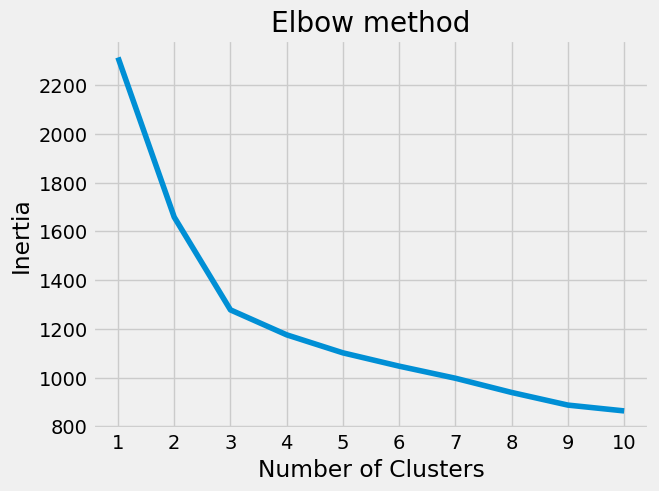

In [40]:
elbow_method(data_standardized,10)

In [52]:
number_of_clusters = 3

In [ ]:
#k-means, agglomerative clustering
kmeans = KMeans(n_clusters = 3, random_state=RSEED )
kmeans.fit(data_standardized)

kmeans_labels = kmeans.labels_

C:\Users\Nataqi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
labels_dict = {}

labels_dict["kmeans"] = kmeans_labels

In [43]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clustering.fit(data_standardized)

ward_labels = agg_clustering.labels_ 

In [44]:
labels_dict["ward"] = ward_labels

In [45]:
agg_clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agg_clustering.fit(data_standardized)

complete_labels  = agg_clustering.labels_

In [46]:
labels_dict["complete"] = complete_labels

In [ ]:
#evaluation metrics, silhouette, purity
from sklearn.metrics import silhouette_score

def evaluation_metrics(X, labels_pred, labels_true,  metric, rseed = RSEED):
 
    s_s = silhouette_score(X, labels = labels_pred, metric = metric, random_state = rseed)
    pu = purity(labels_true,labels_pred)
    return s_s, pu

In [48]:
for keys, values in labels_dict.items():
    print("Clustering Algorithm: ", keys)
    s_s, pu = evaluation_metrics(data_standardized, values, wine.target, 'euclidean', rseed = RSEED)
    if pu == None:
        print("Silhouette Score: ", np.round(s_s, decimals=3) , "Purity: ", pu)
    else:
        print("Silhouette Score: ", np.round(s_s, decimals=3) , "Purity: ", np.round(pu, decimals=3))



Clustering Algorithm:  kmeans
Silhouette Score:  0.285 Purity:  0.966
Clustering Algorithm:  ward
Silhouette Score:  0.277 Purity:  0.927
Clustering Algorithm:  complete
Silhouette Score:  0.204 Purity:  0.837


Text(0.5, 1.0, 'Agglomerative - Complete')

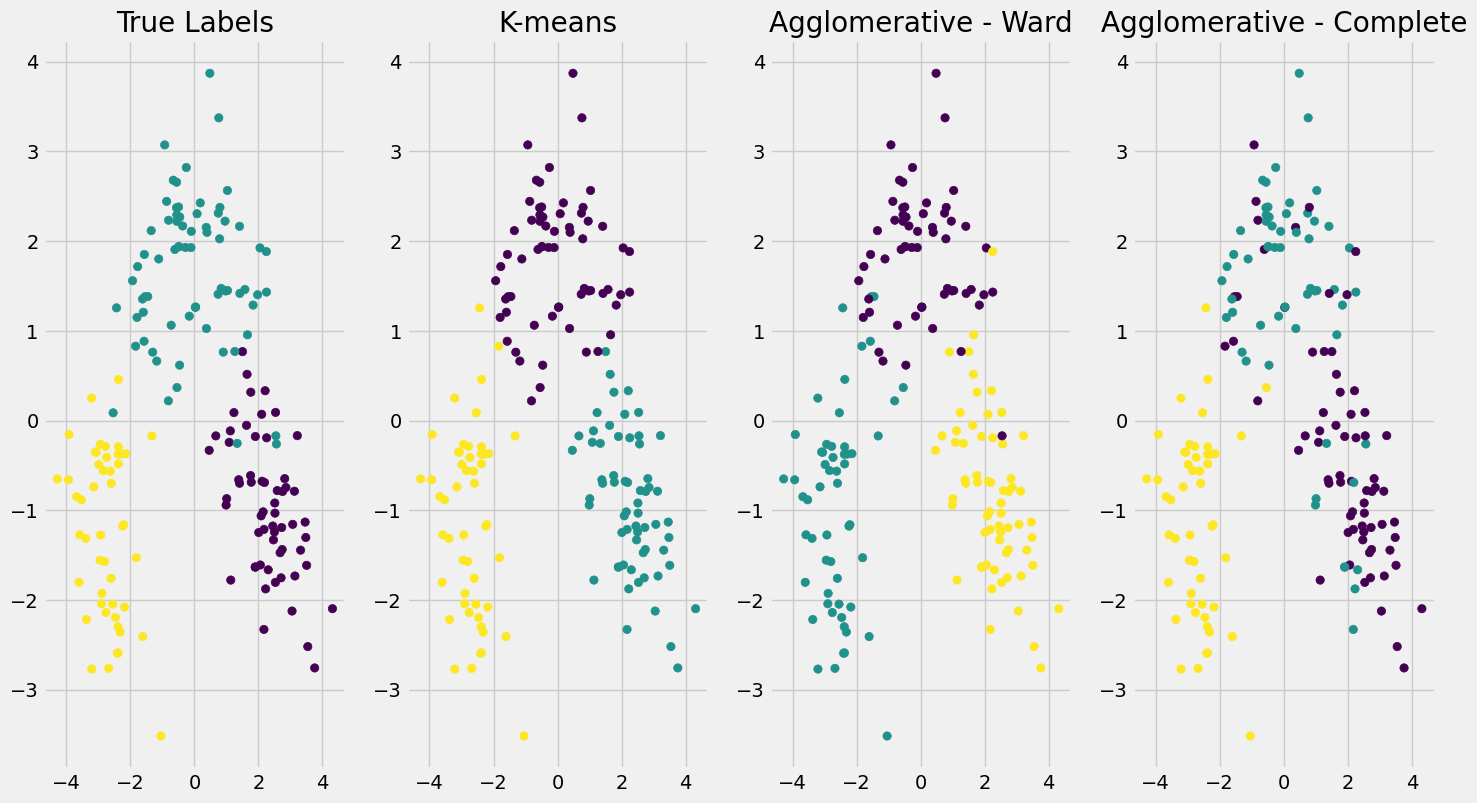

In [ ]:
#plotting, 2 proncipal components with colors respective to the class, clustering labels of the 3 algorithms (k-means, aggromerative with two different distances)

pca = PCA(n_components = 2, random_state = RSEED)
pca_2d = pca.fit_transform(data_standardized)
df_principal_components = pd.DataFrame(pca.components_ )

PCA1 = pca_2d[:,0]
PCA2 = pca_2d[:,1]

fig, ax = plt.subplots(1, 4, figsize=(16,9))

plt.subplot(1, 4, 1)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = data['class'])
plt.title("True Labels")

plt.subplot(1, 4, 2)
plt.scatter(PCA1,PCA2, c = kmeans_labels )
plt.title("K-means")

plt.subplot(1, 4, 3)
plt.scatter(PCA1,PCA2, c = ward_labels)
plt.title("Agglomerative - Ward")

plt.subplot(1, 4, 4)
plt.scatter(PCA1,PCA2, c = complete_labels)
plt.title("Agglomerative - Complete")

In [ ]:
#k-medians

def Kmedians(X, n_clusters, rseed=RSEED):
  
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers, metric = 'manhattan')
        new_centers = []
        for i in range(n_clusters):
            updated_center = np.median(X[labels == i], axis = 0)
            new_centers.append(updated_center)
        new_centers = np.array(new_centers)
        
        if np.all(centers == new_centers): 
            break
        centers = new_centers
        
        
    return centers, labels
    

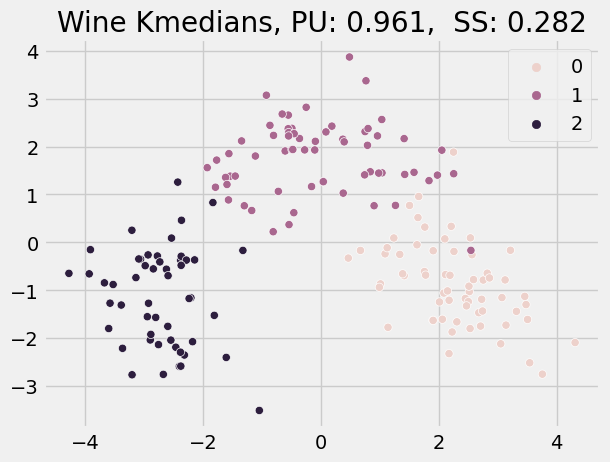

In [54]:
centers, labels = Kmedians(data_standardized.values, number_of_clusters)

s_s, pu = evaluation_metrics(data_standardized.values, labels, wine.target, 'euclidean', rseed = RSEED)


sns.scatterplot(x=pca_2d[:, 0],y=pca_2d[:, 1], hue=labels)
if pu == None:
    plt.title("Wine Kmedians, PU: {},  SS: {}".format(pu, np.round(s_s, decimals=3)))  
else:
    plt.title("Wine Kmedians, PU: {},  SS: {}".format(np.round(pu, decimals=3), np.round(s_s, decimals=3)))